# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
realized_pnl_time=pd.DataFrame()
for key in profit_and_loss:

    temp=profit_and_loss[key]
    realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)

realized_pnl_time.columns=realized_pnl_time.columns+'USDT'

realized_pnl_time=realized_pnl_time.sort_index().fillna(0)
realized_pnl_time.index=realized_pnl_time.index.strftime(date_format='%Y-%m-%d')
realized_pnl_time.groupby(realized_pnl_time.index).sum()
realized_pnl_time=realized_pnl_time.cumsum()
realized_pnl_time = realized_pnl_time[~realized_pnl_time.index.duplicated(keep='last')]
realized_pnl_time=realized_pnl_time.sum(axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11088\1326421339.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)


In [15]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [16]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [17]:
holding=Binance.get_inventory()

In [18]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4548.922561,1.0001,-131.886217,2363.98,2232.093783
OMUSDT,526.319895,2734.137443,0.6011,0.000000,2207.82,2207.820000
BTCUSDT,601.021649,854.573964,0.1879,3.537078,253.55,257.087078
SOLUSDT,281.200518,358.464613,0.0788,0.000000,77.26,77.260000
JASMYUSDT,387.458505,284.386207,0.0625,0.000000,-103.07,-103.070000
ETHUSDT,250.747339,182.959907,0.0402,0.000000,-67.79,-67.790000
TRXUSDT,76.868953,112.610097,0.0248,-10.723889,35.74,25.016111
BBUSDT,60.176053,20.744653,0.0046,-39.733101,-39.43,-79.163101
BNBUSDT,1.142121,1.045674,0.0002,-10.606040,-0.10,-10.706040
PEPEUSDT,0.000004,0.000002,0.0000,-38.521986,-0.00,-38.521986


In [19]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

436

In [20]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [21]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [22]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [23]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [24]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [25]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [27]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [28]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [29]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [30]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [31]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [32]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [33]:
# pnl_history['Total']

In [34]:
#pnl_history['Total']-pnl_history['Total'].shift(1)

In [35]:
realized_pnl_time2=pd.DataFrame()

realized_pnl_time2.index=quantities.index
realized_pnl_time2=realized_pnl_time2.sort_index()

realized_pnl_time2.index=realized_pnl_time2.index.strftime(date_format='%Y-%m-%d')

    
realized_pnl_time2=pd.concat([realized_pnl_time2,realized_pnl_time])

realized_pnl_time2=realized_pnl_time2.sort_index().fillna(0)
realized_pnl_time2.index=pd.to_datetime(realized_pnl_time2.index)
realized_pnl_time2.groupby(realized_pnl_time2.index).sum()

realized_pnl_time2 = realized_pnl_time2[~realized_pnl_time2.index.duplicated(keep='first')]

realized_pnl_time2.columns=['Realized PnL']

In [36]:
realized_pnl_time2=realized_pnl_time2.fillna(0)

In [37]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1)+realized_pnl_time2['Realized PnL'].loc[quantities.index].cumsum().shift(-1).fillna(0)

In [38]:
pnl_history['Total']

2024-09-23    -242.846960
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-02-03    2467.233102
2025-02-04    2239.692343
2025-02-05    2199.786173
2025-02-06    2196.544551
2025-02-07    2409.675040
Name: Total, Length: 138, dtype: float64

In [39]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24   -108.382879
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-02-03    594.242579
2025-02-04   -227.540759
2025-02-05    -39.906169
2025-02-06     -3.241622
2025-02-07    213.130489
Name: Total, Length: 138, dtype: float64

In [40]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [41]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [42]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [43]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\Admin\AppData\Local\Temp\ipykernel_11088\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [44]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [45]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [46]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

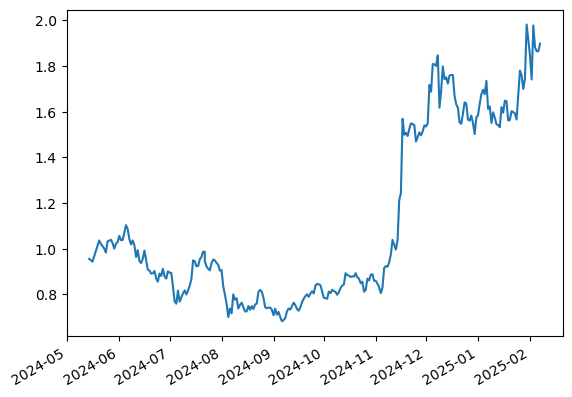

In [47]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

<Axes: >

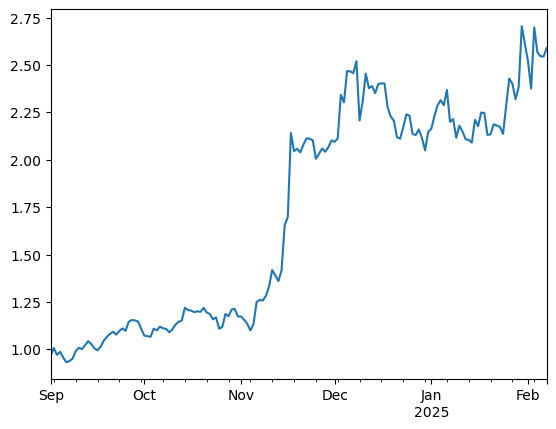

In [48]:
(1+historical_ptf['Historical Portfolio'].loc['2024-09':]).cumprod().plot()

## Ex ante data

In [50]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [53]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [54]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [57]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.5077
BNBUSDT,0.2068
XRPUSDT,0.1358
DEXEUSDT,0.0550
PEPEUSDT,0.0414
SUIUSDT,0.0396
AAVEUSDT,0.0072
RAYUSDT,0.0065
ALGOUSDT,0.0000
HBARUSDT,0.0000


In [58]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.464387
BTCUSDT,0.300000
XRPUSDT,0.085205
BNBUSDT,0.077611
DEXEUSDT,0.045673
SUIUSDT,0.022461
PEPEUSDT,0.004664


### Current results

In [60]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [61]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.570001
BTCUSDT,0.318975
TRXUSDT,0.111024


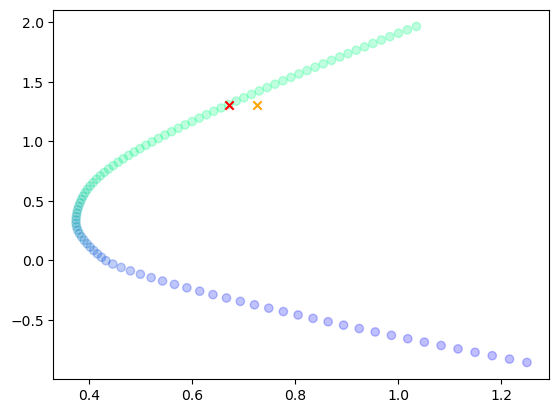

In [62]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [64]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2734.137443,0.601052,0.570001,0.031051
BTCUSDT,854.573964,0.187863,0.318975,-0.131112
SOLUSDT,358.464613,0.078802,0.000000,0.078802
JASMYUSDT,284.386207,0.062517,0.000000,0.062517
ETHUSDT,182.959907,0.040220,0.000000,0.040220
TRXUSDT,112.610097,0.024755,0.111024,-0.086269
BBUSDT,20.744653,0.004560,0.000000,0.004560
BNBUSDT,1.045674,0.000230,0.000000,0.000230
PEPEUSDT,0.000002,0.000000,0.000000,0.000000


In [65]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2734.137443,0.601052,0.464387,0.136665
BTCUSDT,854.573964,0.187863,0.300000,-0.112137
SOLUSDT,358.464613,0.078802,0.000000,0.078802
JASMYUSDT,284.386207,0.062517,0.000000,0.062517
ETHUSDT,182.959907,0.040220,0.000000,0.040220
TRXUSDT,112.610097,0.024755,0.000000,0.024755
BBUSDT,20.744653,0.004560,0.000000,0.004560
BNBUSDT,1.045674,0.000230,0.077611,-0.077381
PEPEUSDT,0.000002,0.000000,0.004664,-0.004664
XRPUSDT,0.000000,0.000000,0.085205,-0.085205


# Risk Reward Analysis

In [67]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [68]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

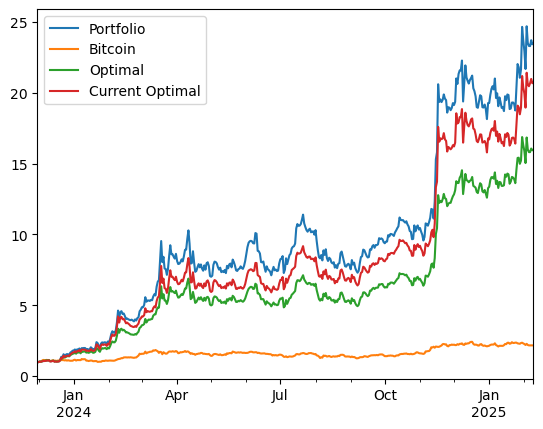

In [69]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [70]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

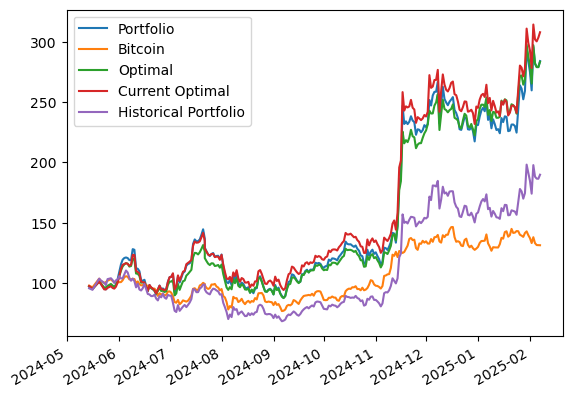

In [71]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [72]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-29,259.349904,141.476921,268.500256,278.307833,174.562610
2025-01-30,295.361175,142.820328,297.811422,311.028623,198.187203
2025-01-31,283.983276,139.657879,287.757035,299.251175,191.324410
2025-02-01,275.008102,137.190295,280.346422,292.827473,184.686080
2025-02-02,259.795371,133.129604,265.485229,278.316632,174.094032
2025-02-03,295.872613,137.983551,297.256026,314.413142,197.785838
2025-02-04,281.688127,133.040925,282.400329,302.044606,188.190244
2025-02-05,279.247718,131.465707,279.068325,300.449228,186.561035
2025-02-06,279.122089,131.386650,279.082627,303.570472,186.471769
2025-02-07,284.106009,131.321931,283.526806,308.008223,189.817980


## Volatilities

In [74]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.682957
 dtype: float64,
 0.6837179993154554)

In [75]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.725706
 dtype: float64,
 0.7257064419586232)

In [76]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.836285
Bitcoin            0.425424
Optimal            0.683718
Current Optimal    0.775738
dtype: float64

In [77]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4685193682355233

In [78]:
days=90
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.8091332425821953

In [79]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.803044814848431

## Risk Contribution

In [81]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.095594,0.077611,0.004974,0.022443,0.002851,0.019592
BTCUSDT,0.356688,0.300000,0.018857,0.105386,0.034844,0.070541
DEXEUSDT,0.088109,0.045673,0.003842,0.024743,0.003843,0.020901
OMUSDT,33.099949,0.464387,0.963813,0.798123,0.705580,0.092543
PEPEUSDT,0.006814,0.004664,0.000330,0.003088,0.000072,0.003016
SUIUSDT,0.031399,0.022461,0.001547,0.011046,0.000978,0.010068
XRPUSDT,0.145993,0.085205,0.006639,0.035170,0.007096,0.028074


In [82]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.224370,0.570001,0.823158,0.855461,0.774374,0.081087
BTCUSDT,0.130105,0.318975,0.132289,0.096460,0.036393,0.060067
TRXUSDT,0.040222,0.111024,0.044554,0.048080,0.018391,0.029689


In [83]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.365089,0.606061,0.867467,0.837913,0.747504,0.090409
BTCUSDT,0.078281,0.191919,0.078889,0.055909,0.011249,0.044659
SOLUSDT,0.005784,0.080808,0.025282,0.042030,0.005502,0.036528
JASMYUSDT,-0.021832,0.060606,0.011321,0.044335,0.008591,0.035744
ETHUSDT,-0.009555,0.040404,0.009007,0.013518,0.000920,0.012599
TRXUSDT,0.007319,0.020202,0.008035,0.006295,0.000520,0.005775


# Value At Risk

## Historical

### Optimal Weights

In [87]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.051757498726094, -0.07799484910049115)

### Current Weights

In [89]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.05043639052894465, -0.07620596488641164)

In [90]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [91]:
var=historical_var.iloc[row]
var

OMUSDT      -0.029983
BTCUSDT     -0.006012
SOLUSDT     -0.003001
JASMYUSDT   -0.008437
ETHUSDT     -0.001147
TRXUSDT     -0.001167
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.049748
Name: 2025-01-19 00:00:00, dtype: float64

In [92]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.057411
BTCUSDT     -0.005134
SOLUSDT     -0.004254
JASMYUSDT   -0.005262
ETHUSDT     -0.001696
TRXUSDT     -0.000685
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.074442
dtype: float64

## Parametric

### Optimal Weights

In [95]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.07084415091489399, -0.09080261414997602)

### Current Weights

In [97]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.07519482702737337, -0.09637897803084976)

## Multivariate

### Optimal Weights

In [100]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06349367151932558, -0.0824470531916652)

### Current Weights

In [102]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.07035455330675114, -0.08908141739742623)

In [103]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.060591
BTCUSDT     -0.003328
SOLUSDT     -0.002679
JASMYUSDT   -0.002326
ETHUSDT     -0.000834
TRXUSDT     -0.000369
Portfolio   -0.070127
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [107]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06355844301888079, -0.08151994382011657)

### Current Weights

In [109]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06961996968468892, -0.08715975206793623)

In [110]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.058763
BTCUSDT     -0.003497
SOLUSDT     -0.002733
JASMYUSDT   -0.003219
ETHUSDT     -0.001179
TRXUSDT     -0.000500
Portfolio   -0.069891
dtype: float64

## Student Copula

### Optimal Weights

In [113]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06256396715771685, -0.08189977498385262)

### Current Weights

In [115]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07077328730991182, -0.09077911671934123)

In [116]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.057858
BTCUSDT     -0.004019
SOLUSDT     -0.003778
JASMYUSDT   -0.003931
ETHUSDT     -0.001275
TRXUSDT     -0.000570
Portfolio   -0.071431
dtype: float64

## Gumbel Copula

### Optimal Weights

In [119]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.1295260720857688, -0.18404675320232594)

### Current Weights

In [121]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.13888699620445377, -0.1985989225084769)

In [122]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.138085
BTCUSDT     -0.000666
SOLUSDT     -0.001502
JASMYUSDT   -0.000439
ETHUSDT     -0.000313
TRXUSDT      0.000069
Portfolio   -0.140937
dtype: float64

## Monte Carlo

### Optimal

In [125]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [126]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07360907670045323, -0.09165441094705833)

### Current Weights

In [128]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07680276091678333, -0.09597203877304494)

In [129]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.065357
BTCUSDT     -0.003719
SOLUSDT     -0.003159
JASMYUSDT   -0.003132
ETHUSDT     -0.001023
TRXUSDT     -0.000401
Portfolio   -0.076792
dtype: float64

## VaR Violation

In [131]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.058956,-0.105787,-0.087550,-0.020791
2024-01-15,-0.058956,-0.105771,-0.088553,0.018031
2024-01-16,-0.058956,-0.105964,-0.089801,0.053157
2024-01-17,-0.058956,-0.108232,-0.090589,-0.034227
2024-01-18,-0.058956,-0.110272,-0.094796,-0.032690
...,...,...,...,...
2025-02-05,-0.055702,-0.101618,-0.099215,-0.011799
2025-02-06,-0.052130,-0.098071,-0.092353,0.000051
2025-02-07,-0.052130,-0.098052,-0.094757,0.015924
2025-02-08,-0.052130,-0.096428,-0.087028,-0.007592


In [132]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.041094,-0.083813,-0.083652,-0.015445
2024-05-29,-0.041094,-0.081585,-0.077011,-0.007437
2024-05-30,-0.041094,-0.071248,-0.069767,0.027658
2024-05-31,-0.041094,-0.074225,-0.069997,0.044388
2024-06-01,-0.041094,-0.079448,-0.075243,0.060689
...,...,...,...,...
2025-02-05,-0.054285,-0.152315,-0.136398,-0.008664
2025-02-06,-0.054285,-0.152343,-0.138420,-0.000450
2025-02-07,-0.054285,-0.151813,-0.138931,0.017856
2025-02-08,-0.054285,-0.150777,-0.132094,-0.012041


<Axes: >

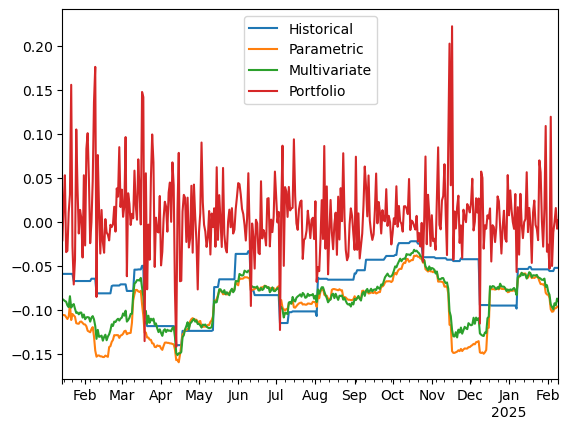

In [133]:
var_data.plot()

<Axes: >

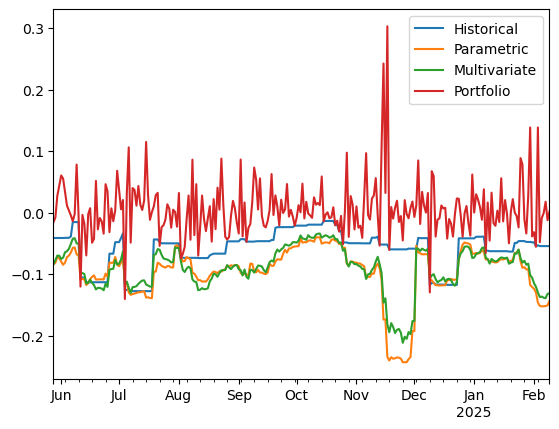

In [134]:
current_var_data.plot()

In [135]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.022901,0.007634,0.010178
Kupiec Stat,7.545599,22.754939,19.212771
P-value,0.006016,0.000002,0.000012


In [136]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.05814,0.015504,0.011628
Kupiec Stat,0.342731,8.751868,11.44291
P-value,0.558257,0.003093,0.000718


# Principal Component Analysis

## Historical PCA

In [139]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.7857675 , 0.06800758, 0.05592549, 0.05010632, 0.0401931 ])

In [140]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.016174
ADAUSDT     0.016133
ALGOUSDT    0.018595
APTUSDT     0.016791
ARBUSDT     0.017984
              ...   
WBTCUSDT    0.009169
WLDUSDT     0.022642
XLMUSDT     0.013488
XRPUSDT     0.011623
XTZUSDT     0.016725
Name: PC1, Length: 61, dtype: float64

<Axes: >

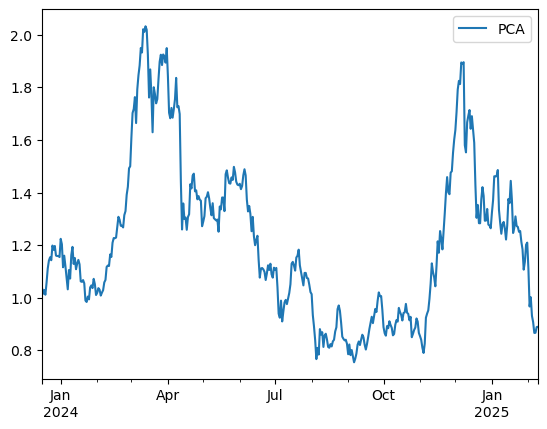

In [141]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

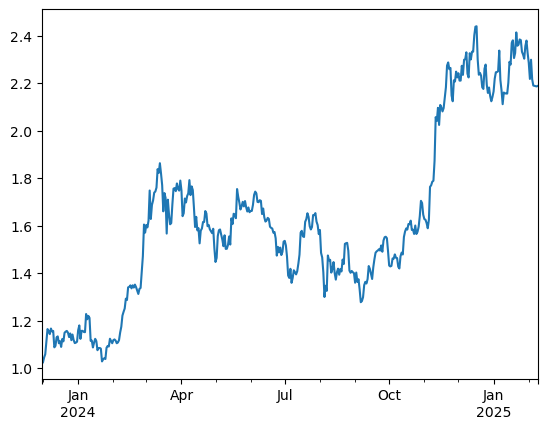

In [142]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [143]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.426645
WBETHUSDT    0.445254
ETHUSDT      0.445482
ATOMUSDT     0.463372
DOTUSDT      0.464199
ETCUSDT      0.468699
NEXOUSDT     0.481426
ADAUSDT      0.507741
EOSUSDT      0.525553
WBTCUSDT     0.528296
BTCUSDT      0.528820
AVAXUSDT     0.531862
IOTAUSDT     0.552049
FILUSDT      0.561409
ARBUSDT      0.569961
GRTUSDT      0.579037
XTZUSDT      0.584312
LINKUSDT     0.598065
IMXUSDT      0.609005
dtype: float64

<Axes: >

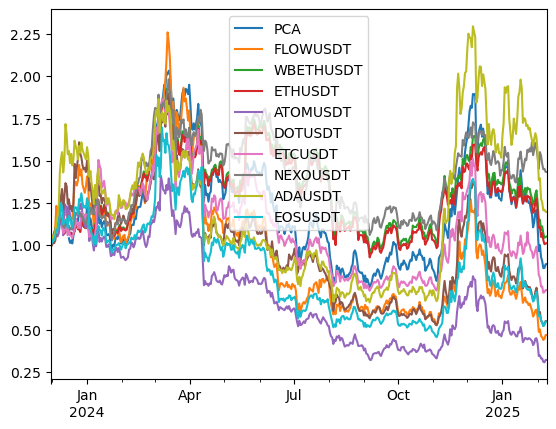

In [144]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

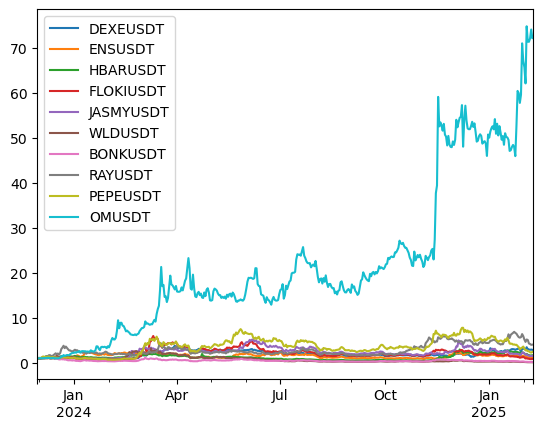

In [145]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [147]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.5690463 , 0.1475334 , 0.11820794, 0.09463826, 0.07057409])

In [148]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.095054
BTCUSDT      0.059053
SOLUSDT      0.097973
JASMYUSDT    0.176109
ETHUSDT      0.084380
TRXUSDT      0.055194
BBUSDT       0.206435
BNBUSDT      0.065662
PEPEUSDT     0.160139
Name: PC1, dtype: float64

<Axes: >

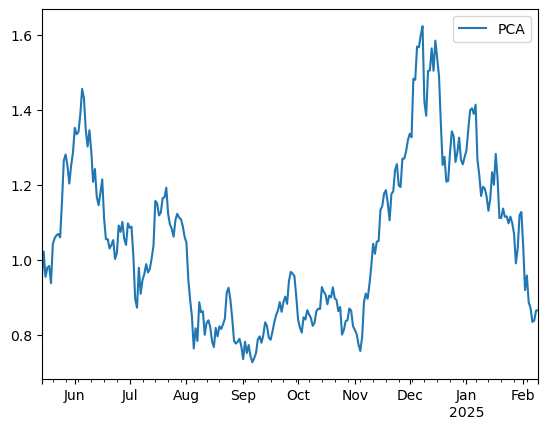

In [149]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

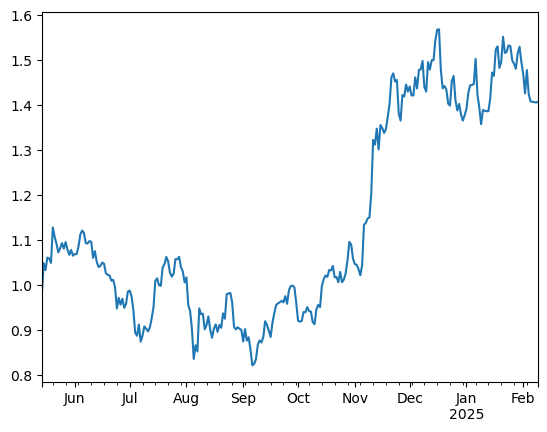

In [150]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [151]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.436917
BNBUSDT      0.469809
BTCUSDT      0.492616
SOLUSDT      0.492816
JASMYUSDT    0.692905
PEPEUSDT     0.745744
BBUSDT       0.776575
TRXUSDT      0.906577
OMUSDT       0.977540
dtype: float64

<Axes: >

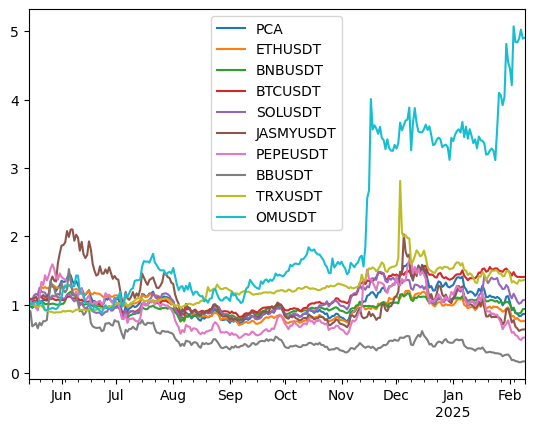

In [152]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [154]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.907942
BBUSDT       1.572993
JASMYUSDT    1.344418
SOLUSDT      1.166108
BTCUSDT      1.000000
ETHUSDT      0.971985
OMUSDT       0.894871
BNBUSDT      0.666963
TRXUSDT      0.327942
Name: BTCUSDT, dtype: float64

In [155]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.576733
PEPEUSDT     2.240696
BBUSDT       1.993414
SOLUSDT      1.452288
OMUSDT       1.175583
ETHUSDT      1.132756
TRXUSDT      1.015387
BTCUSDT      1.000000
BNBUSDT      0.766369
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [157]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [158]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.377698
BBUSDT,0.315675
TRXUSDT,0.170027
ETHUSDT,0.140819
SOLUSDT,0.096340
PEPEUSDT,0.094171
JASMYUSDT,0.080841
OMUSDT,0.015154
BNBUSDT,-0.051383


### Regression to PCA

In [160]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.6774674289737476

In [161]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.303033
BNBUSDT      1.173005
ETHUSDT      1.025994
PCA          1.000000
SOLUSDT      0.752027
JASMYUSDT    0.441262
PEPEUSDT     0.417459
BBUSDT       0.387014
TRXUSDT      0.263909
OMUSDT       0.243783
dtype: float64

In [162]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.877414
BNBUSDT      1.480871
ETHUSDT      1.228207
TRXUSDT      1.101251
PCA          1.000000
BBUSDT       0.697233
PEPEUSDT     0.628046
JASMYUSDT    0.517786
SOLUSDT      0.460799
OMUSDT       0.287434
dtype: float64

### Correlation Matrix

<Axes: >

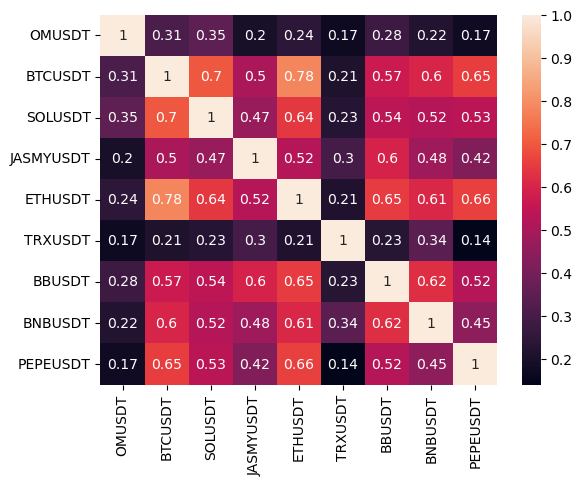

In [164]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

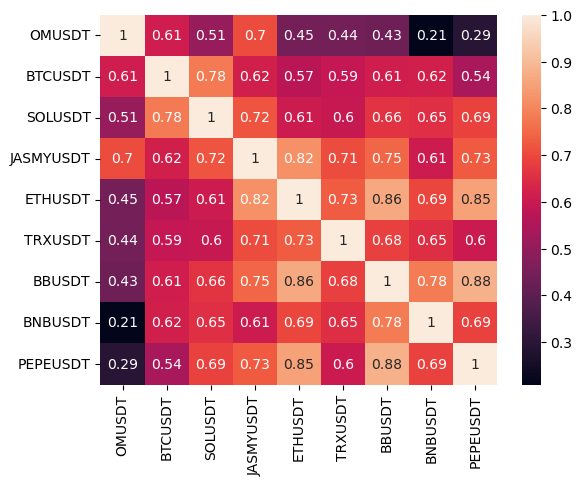

In [165]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [167]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414563,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [168]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-07-04,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.992454,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-08-03,0.582814,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.354890,0.0
2024-09-02,0.498932,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.501068,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-02,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.116061,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-01,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.617888,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-12-01,0.007546,0.0,0.015316,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.063034,0.342592,0.0
2024-12-31,0.509292,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.010487,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-30,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.459487,0.0
2025-02-09,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [169]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      0.992454
AAVEUSDT    0.007546
LDOUSDT     0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
NEARUSDT    0.000000
Name: 2025-02-09 00:00:00, dtype: float64